In [2]:
# ! wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE213nnn/GSE213950/suppl/GSE213950%5FContacts%5Fgene%5Fscore.h5ad.gz
# ! gunzip GSE213950_Contacts_gene_score.h5ad.gz
# ! wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE213nnn/GSE213950/suppl/GSE213950%5FHPC%5Fspatial%5FMERFISH%5F01132024.h5ad.gz
# ! gunzip GSE213950_HPC_spatial_MERFISH_01132024.h5ad.gz

In [1]:
import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
# Load the data
adata = ad.read('GSE213950_Contacts_gene_score.h5ad')
adata # --> data contains 54188 cells, and 42,206 genes. There are no annotations of the cells/genes
'''
adata.obs
Empty DataFrame
Columns: []
Index: [8-3-P6-O17, 8-3-P6-O5, 8-3-P6-O6, 8-3-P6-P17, 8-4-P8-K8, 8-4-P8-N8, 8-4-P8-P20, 8-6-P12-K11, 20210224-GW18-preAb-PFC-B07_A15, 20210224-GW18-preAb-PFC-B07_A16, 20210224-GW18-preAb-PFC-B07_A17, 20210224-GW18-preAb-PFC-B07_A18, 20210224-GW18-preAb-PFC-B07_A19, 20210224-GW18-preAb-PFC-B07_A20, 20210224-GW18-preAb-PFC-B07_A22, 20210224-GW18-preAb-PFC-B07_A4, 20210224-GW18-preAb-PFC-B07_A6, 20210224-GW18-preAb-PFC-B07_A8, 20210224-GW18-preAb-PFC-B07_A9, 20210224-GW18-preAb-PFC-B07_B13, 20210224-GW18-preAb-PFC-B07_B14, 20210224-GW18-preAb-PFC-B07_B15, 20210224-GW18-preAb-PFC-B07_B17, 20210224-GW18-preAb-PFC-B07_B18, 20210224-GW18-preAb-PFC-B07_B19, 20210224-GW18-preAb-PFC-B07_B20, 20210224-GW18-preAb-PFC-B07_B22, 20210224-GW18-preAb-PFC-B07_B4, 20210224-GW18-preAb-PFC-B07_B6, 20210224-GW18-preAb-PFC-B07_C1, 20210224-GW18-preAb-PFC-B07_C17, 20210224-GW18-preAb-PFC-B07_C18, 20210224-GW18-preAb-PFC-B07_C19, 20210224-GW18-preAb-PFC-B07_C2, 20210224-GW18-preAb-PFC-B07_C20, 20210224-GW18-preAb-PFC-B07_C23, 20210224-GW18-preAb-PFC-B07_C3, 20210224-GW18-preAb-PFC-B07_C4, 20210224-GW18-preAb-PFC-B07_C6, 20210224-GW18-preAb-PFC-B07_D12, 20210224-GW18-preAb-PFC-B07_D16, 20210224-GW18-preAb-PFC-B07_D17, 20210224-GW18-preAb-PFC-B07_D18, 20210224-GW18-preAb-PFC-B07_D2, 20210224-GW18-preAb-PFC-B07_D21, 20210224-GW18-preAb-PFC-B07_D22, 20210224-GW18-preAb-PFC-B07_D23, 20210224-GW18-preAb-PFC-B07_D3, 20210224-GW18-preAb-PFC-B07_D7, 20210224-GW18-preAb-PFC-B07_D8, 20210224-GW18-preAb-PFC-B07_D9, 20210224-GW18-preAb-PFC-B07_E1, 20210224-GW18-preAb-PFC-B07_E12, 20210224-GW18-preAb-PFC-B07_E13, 20210224-GW18-preAb-PFC-B07_E15, 20210224-GW18-preAb-PFC-B07_E16, 20210224-GW18-preAb-PFC-B07_E18, 20210224-GW18-preAb-PFC-B07_E2, 20210224-GW18-preAb-PFC-B07_E20, 20210224-GW18-preAb-PFC-B07_E22, 20210224-GW18-preAb-PFC-B07_E3, 20210224-GW18-preAb-PFC-B07_E7, 20210224-GW18-preAb-PFC-B07_F14, 20210224-GW18-preAb-PFC-B07_F19, 20210224-GW18-preAb-PFC-B07_F20, 20210224-GW18-preAb-PFC-B07_F21, 20210224-GW18-preAb-PFC-B07_F22, 20210224-GW18-preAb-PFC-B07_F23, 20210224-GW18-preAb-PFC-B07_F3, 20210224-GW18-preAb-PFC-B07_F6, 20210224-GW18-preAb-PFC-B07_F7, 20210224-GW18-preAb-PFC-B07_G10, 20210224-GW18-preAb-PFC-B07_G12, 20210224-GW18-preAb-PFC-B07_G14, 20210224-GW18-preAb-PFC-B07_G15, 20210224-GW18-preAb-PFC-B07_G18, 20210224-GW18-preAb-PFC-B07_G2, 20210224-GW18-preAb-PFC-B07_G20, 20210224-GW18-preAb-PFC-B07_G21, 20210224-GW18-preAb-PFC-B07_G22, 20210224-GW18-preAb-PFC-B07_G24, 20210224-GW18-preAb-PFC-B07_G6, 20210224-GW18-preAb-PFC-B07_G8, 20210224-GW18-preAb-PFC-B07_H1, 20210224-GW18-preAb-PFC-B07_H11, 20210224-GW18-preAb-PFC-B07_H15, 20210224-GW18-preAb-PFC-B07_H19, 20210224-GW18-preAb-PFC-B07_H2, 20210224-GW18-preAb-PFC-B07_H6, 20210224-GW18-preAb-PFC-B07_H7, 20210224-GW18-preAb-PFC-B07_H8, 20210224-GW18-preAb-PFC-B07_H9, 20210224-GW18-preAb-PFC-B07_I10, 20210224-GW18-preAb-PFC-B07_I11, 20210224-GW18-preAb-PFC-B07_I12, 20210224-GW18-preAb-PFC-B07_I13, 20210224-GW18-preAb-PFC-B07_I15, 20210224-GW18-preAb-PFC-B07_I17, 20210224-GW18-preAb-PFC-B07_I21, 20210224-GW18-preAb-PFC-B07_I22, ...]
'''

'''
mpty DataFrame
Columns: []
Index: [DDX11L1, WASH7P, MIR6859-1, MIR1302-2HG, MIR1302-2, FAM138A, OR4G4P, OR4G11P, OR4F5, CICP27, RNU6-1100P, DDX11L17, WASH9P, MIR6859-2, RPL23AP21, RPL23AP24, WBP1LP7, OR4F29, CICP7, LOC124904706, LOC101928626, MTND1P23, MTND2P28, MTCO1P12, MTCO2P12, MTATP8P1, MTATP6P1, MTCO3P12, WBP1LP6, OR4F16, CICP3, RNU6-1199P, LINC01409, FAM87B, LINC01128, LINC00115, FAM41C, TUBB8P11, LINC02593, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, HES4, ISG15, AGRN, LOC100288175, RNF223, C1orf159, LINC01342, MIR200B, MIR200A, MIR429, TTLL10-AS1, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, UBE2J2, LINC01786, SCNN1D, ACAP3, MIR6726, PUSL1, INTS11, MIR6727, CPTP, TAS1R3, DVL1, MIR6808, MXRA8, AURKAIP1, NDUFB4P8, CCNL2, MRPL20-AS1, MRPL20, RN7SL657P, MRPL20-DT, ANKRD65, ANKRD65-AS1, TMEM88B, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, FNDC10, MIB2, MMP23B, CDK11B, SLC35E2B, MMP23A, CDK11A, SLC35E2A, NADK, ...]
'''

'\nmpty DataFrame\nColumns: []\nIndex: [DDX11L1, WASH7P, MIR6859-1, MIR1302-2HG, MIR1302-2, FAM138A, OR4G4P, OR4G11P, OR4F5, CICP27, RNU6-1100P, DDX11L17, WASH9P, MIR6859-2, RPL23AP21, RPL23AP24, WBP1LP7, OR4F29, CICP7, LOC124904706, LOC101928626, MTND1P23, MTND2P28, MTCO1P12, MTCO2P12, MTATP8P1, MTATP6P1, MTCO3P12, WBP1LP6, OR4F16, CICP3, RNU6-1199P, LINC01409, FAM87B, LINC01128, LINC00115, FAM41C, TUBB8P11, LINC02593, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, HES4, ISG15, AGRN, LOC100288175, RNF223, C1orf159, LINC01342, MIR200B, MIR200A, MIR429, TTLL10-AS1, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, UBE2J2, LINC01786, SCNN1D, ACAP3, MIR6726, PUSL1, INTS11, MIR6727, CPTP, TAS1R3, DVL1, MIR6808, MXRA8, AURKAIP1, NDUFB4P8, CCNL2, MRPL20-AS1, MRPL20, RN7SL657P, MRPL20-DT, ANKRD65, ANKRD65-AS1, TMEM88B, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, FNDC10, MIB2, MMP23B, CDK11B, SLC35E2B, MMP23A, CDK11A, SLC35E2A, NADK, ...]\n'

In [3]:
adata = ad.read('GSE213950_HPC_spatial_MERFISH_01132024.h5ad')
adata

AnnData object with n_obs × n_vars = 50374 × 298
    obs: 'volm', 'x_um_abs', 'y_um_abs', 'zc', 'xc', 'yc', 'leiden', 'region', 'L1', 'dpt_pseudotime', 'final_anno_v3', 'hpc_regional', 'fimbria_regional', 'hpcRG', 'fimbriaRG', 'ventricular_regional', 'ventricularRG', 'refined_volume'
    var: 'mean', 'std'
    uns: 'L1_colors', 'X_h_score_shape', 'antibody_shape', 'diffmap_evals', 'final_anno_colors', 'final_anno_v2_colors', 'final_anno_v3_colors', 'iroot', 'leiden', 'leiden_colors', 'leiden_load_colors', 'log1p', 'neighbors', 'rank_genes_groups', 'scToSpatial_colors', 'umap'
    obsm: 'H3K9me3', 'K27Ac', 'LamA', 'Nup98', 'Pol2PSer2', 'Sc35', 'X_diffmap', 'X_fov', 'X_h_score', 'X_pca', 'X_raw', 'X_spatial', 'X_umap', 'blank'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obs  # this shows that the cells in merfish are from the different datasets than data from GSE213950_Contacts_gene_score.h5ad

,volm,x_um_abs,y_um_abs,zc,xc,yc,leiden,region,L1,dpt_pseudotime,final_anno_v3,hpc_regional,fimbria_regional,hpcRG,fimbriaRG,ventricular_regional,ventricularRG,refined_volume
Conv_zscan__0061_6100024,4501.0,7016.061035,1414.499390,1.793157,135.543884,25.439901,3,HIP,Exc,0.497155,CA2-3,1,0,NaN,NaN,0,NaN,NaN
Conv_zscan__0061_6100034,27216.0,7083.697266,1426.654785,7.949846,343.661957,62.842003,4,HIP,Exc,0.282490,Choroid Plexus,1,0,NaN,NaN,0,NaN,5351.0
Conv_zscan__0061_6100156,5985.0,7042.306152,1411.176880,8.040267,216.301086,15.216208,2,HIP,Exc,0.252185,Intermediate 2,1,0,NaN,NaN,0,NaN,3717.0
Conv_zscan__0062_20200020,26871.0,7166.385254,1235.644409,8.744297,594.094727,93.099739,1,HIP,Exc,0.508173,CA1,1,0,NaN,NaN,0,NaN,NaN
Conv_zscan__0062_20200028,34261.0,7187.341797,1210.520142,11.089490,658.577759,15.791862,1,HIP,Exc,0.512210,CA1,1,0,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Conv_zscan__1147_115200080,35072.0,6074.351562,1809.806641,12.146527,262.887360,593.807007,2,HIP,Exc,0.376161,Intermediate 2,1,0,NaN,NaN,1,NaN,NaN
Conv_zscan__1147_115200120,39885.0,6167.131836,1795.223022,12.280506,548.374817,548.932983,3,HIP,Exc,0.482270,CA2-3,1,0,NaN,NaN,1,NaN,NaN
Conv_zscan__1147_115200144,23631.0,6097.581055,1807.138428,9.043333,334.365204,585.596985,3,HIP,Exc,0.512106,CA2-3,1,0,NaN,NaN,1,NaN,NaN
Conv_zscan__1147_115200176,15563.0,6139.897949,1814.577881,10.837178,464.574890,608.488281,6,HIP,Exc,0.389447,Intermediate 3,1,0,NaN,NaN,1,NaN,8764.0


Based on the paper (), below is the annotation in the adata object from the MERFISH data

### obs

volm: total pixel volume of the cell based on DAPI segmentation;

x_um_abs, y_um_abs: global x and y coordinates of the cell in micrometres;

zc, xc, yc: pixel coordinates of the cell centre relative to the field of view;

Leiden: unsupervised Leiden clustering;

L1: excitatory versus inhibitory;

dpt_pseudotime: pseudotime calculated from RG-1;

Final_anno_v3: annotation used in figures;

Hpc_regional: spatial subset of cells restricted to the HPC;

hpcRG: RG-1 and RG-2 annotation in this zone;

Fimbria_regional: spatial subset of cells restricted to the HPC;

fimbriaRG: RG-1 and RG-2 annotation in this zone;

Ventricular_regional: spatial subset of cells restricted to the ventricular zone;

ventricularRG: RG-1 and RG-2 annotation in this zone;

Refined_volume: Recalculated cell volume based on Nup98 antibodies.

### var

mean: average expression of the gene across cells;

std: standard deviation of the gene expression across cells.

### uns

X_h_score_shape: original shape of X_h_score in obsm;

antibody_shape: original shape of each antibody matrix in obsm.

### obsm

X_fov: the field-of-view identifier each cell was imaged in;

X_raw: raw count matrix;

X_spatial: the spatial coordinates of the cells;

blank: the count of each blank barcode per cell;

X_h_score: a csr sparse matrix containing chromatin trace results. The matrix should be reshaped to 50,374 ×4 × 354 × 5, representing the number of cells, maximum number of homologues, number of chromatin regions, and the z, x, y coordinates followed by the brightness and score of the fluorescent spot. Missing data (that is, containing fewer than four homologues or missing regions) are filled with 0 s;

H3 K9 trimethylation, Pol2PSer2, SRSF2, K27Ac, LAMA1, NUP98: antibody signals localized at each chromatin region. Stored as a csr sparse matrix and can be reshaped to 50,374 × 4 × 354, similar to X_h_score.

In [5]:
# create a new anndata object with the raw data
new_ad = ad.AnnData(X=adata.obsm['X_raw'], obs=adata.obs, var=adata.var)

In [6]:
new_ad

AnnData object with n_obs × n_vars = 50374 × 298
    obs: 'volm', 'x_um_abs', 'y_um_abs', 'zc', 'xc', 'yc', 'leiden', 'region', 'L1', 'dpt_pseudotime', 'final_anno_v3', 'hpc_regional', 'fimbria_regional', 'hpcRG', 'fimbriaRG', 'ventricular_regional', 'ventricularRG', 'refined_volume'
    var: 'mean', 'std'

In [7]:
new_ad = ad.AnnData(X=adata.obsm['X_raw'], obs=adata.obs, var=adata.var)
new_ad.obsm['X_raw'] = new_ad.X  # copy from X to X_raw, so we can transform X
sc.pp.normalize_per_cell(new_ad, counts_per_cell_after=1e6)
sc.pp.normalize_total(new_ad, target_sum=1e4)  # Normalize each cell to 10,000 counts
sc.pp.log1p(new_ad) # log transform the data
sc.pp.scale(new_ad, max_value=None)  # scale the data such that each gene has mean 0 and variance 1. this is the transformation that is closest to the values shared in the paper. 


# neighbordhood graph, leiden clustering, and UMAP

In [8]:
sc.pp.neighbors(new_ad, n_neighbors=25, use_rep='X')
sc.tl.leiden(new_ad, resolution=0.5, key_added='leiden')
sc.tl.umap(new_ad)
# the adata provided by the author has 10 leiden groups. I tried different parameters for n_neighbors until I get 10 leiden groups, such that the spatial plot looks similar to one I would get from using author's adata

2024-11-07 22:26:07.565679: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-07 22:26:07.567319: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-07 22:26:07.602936: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-07 22:26:07.603783: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-07 22:26:08.226020: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

/gladstone/engelhardt/home/hvu/anaconda3/envs/breastC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


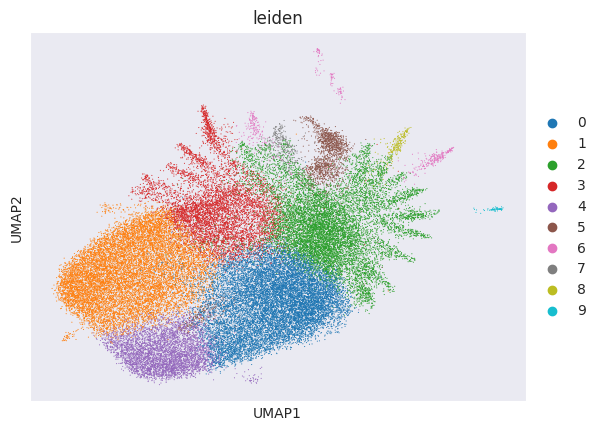

In [9]:
# plot the UMAP plot with each cell colored by its leiden cluster
sc.pl.umap(new_ad, color=['leiden'])  

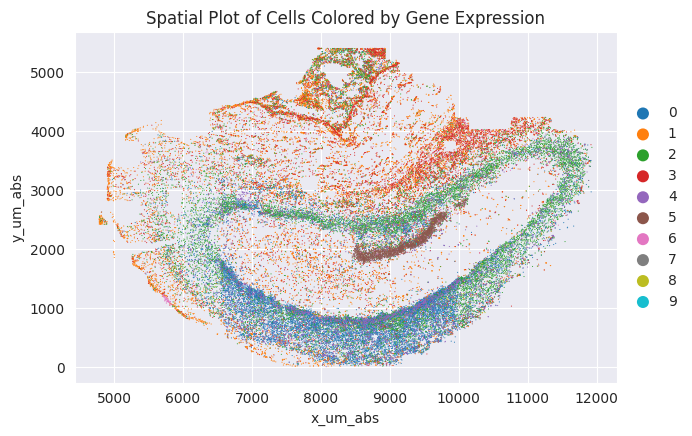

In [11]:
# plots cells with their spatial coordinates, and color them by their leiden cluster
new_ad.obsm['spatial'] = new_ad.obs[['x_um_abs', 'y_um_abs']].values # first, assign the columns 'x_um_abs', 'y_um_abs' in obs to spatial coordinates
sc.pl.scatter(
    new_ad, 
    x='x_um_abs', 
    y='y_um_abs', 
    color='leiden',  # Replace with your gene name
    title='Spatial Plot of Cells Colored by Gene Expression'
)

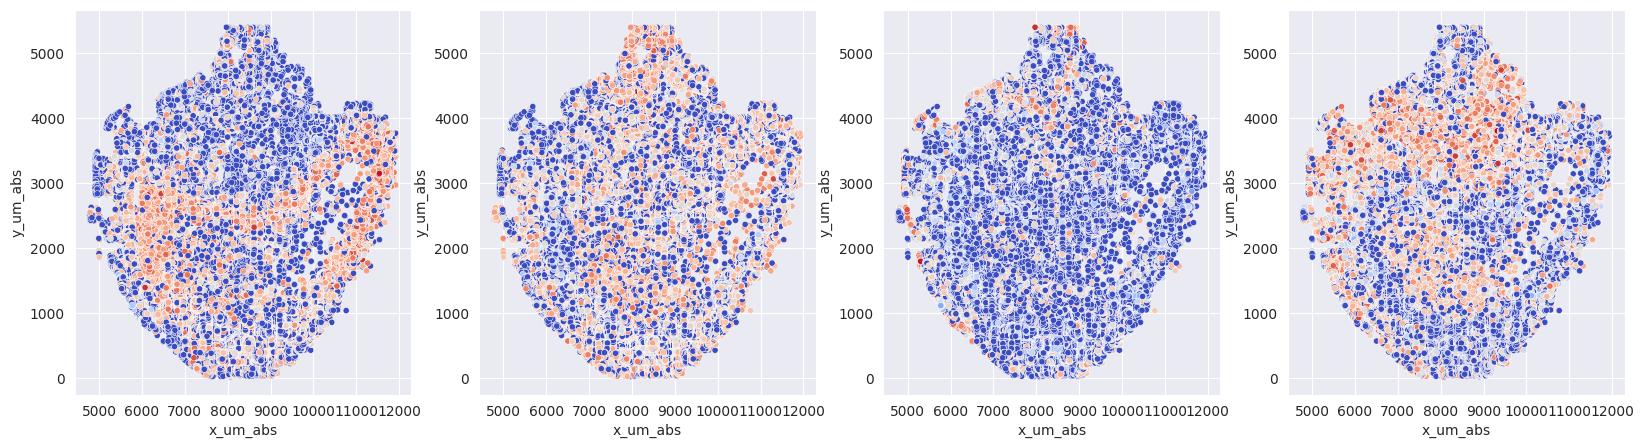

In [27]:
# plots cells with their spatial coordinates, and color them gene expression, Supp. Fig. 5b
groups = ['CA2-3', 'Choriod Plexus', 'Ependyma', 'RG-1']
genes_supp5b = ['HS3ST4', 'SATB2','DNAH9', 'EGFR']
new_ad.uns['spatial'] = {
    'library_id': {'scalefactors': {'spot_diameter_fullres': 20}}
}
# sc.pl.spatial(
#     new_ad,
#     color=genes_supp5b,  # List of genes in new_ad.var
#     title='Spatial Plot of Cells Colored by Gene Expression',
#     size=20  # Adjust size as needed
# )
# sc.pl.scatter(
#     new_ad, 
#     x='x_um_abs', 
#     y='y_um_abs', 
#     color='CA2-3',  # Replace with your gene name
#     title='Spatial Plot of Cells Colored by Gene Expression'
# )

fig, axes = plt.subplots(figsize=(20, 5), ncols=4, nrows=1)
plot_df = new_ad.obs[['x_um_abs', 'y_um_abs']].copy()
cmap = sns.color_palette("coolwarm", as_cmap=True)

for i, gene in enumerate(genes_supp5b):
    ax = axes[i % 4]
    try:
        plot_df[gene] = new_ad.X[:, new_ad.var.index.get_loc(gene)]
        sns.scatterplot(
            data=plot_df,
            x='x_um_abs',
            y='y_um_abs',
            hue=gene,
            ax=ax,
            s=20,
            legend=False,
            palette=cmap
        )
    except:
        print(f'{gene} not found in the data')
        pass